#  ------------------------------------ Prueba Técnica Bipi ------------------------------------

# Dado el dataset que se adjunta, contestar las siguientes preguntas:



## - ¿Qué método de pandas utilizarías para cargar la información en un dataframe?

Para cargar los datos los subi a mi github y utilizo pandas con pd.read_csv('archivo.csv') para cargarlos

## - ¿Qué alternativa a pandas podrías utilizar?

Pyspark y SQL con la libreria SQLite

##  ¿Qué procedimientos harías para hacer una limpieza de los datos?

Primero un analisis general para ver el contenido de los datos, como su media, max, min, revision de valores nulos y duplicados, cambio de nombre en algunas columnas para facilitar su manejo

## URL del Archivo

In [1]:
#Datos subidos a GitHub
url = "https://raw.githubusercontent.com/maria-camberos/prueba_tecnica/main/customers.csv"

## Carga con Pandas

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


## Carga con PySpark

In [5]:
#pip install findspark

In [6]:
#pip install pyspark

In [7]:
#Importamos las librerias
import findspark
findspark.init()

In [8]:
import pyspark
from pyspark.sql import SparkSession

In [9]:
#Configuramos y creamos una sesión de Spark en este caso local
spark = SparkSession.builder.config("spark.driver.host", "localhost").appName("my_session").getOrCreate()

In [10]:
#Verificamos que este funcionando correctamente
prueba = spark.sql("select 'spark' as hello")

In [11]:
prueba.show()

+-----+
|hello|
+-----+
|spark|
+-----+



In [12]:
#Importamos las librerias para realizar solicitudes HTTP a servidores web y despues trabajar con flujos de datos en memoria
import requests
import io
from io import StringIO

In [13]:
#Descargmos los datos desde GitHub y los convertimos en un objeto StringIO
response = requests.get(url)
csv_content = StringIO(response.text)

In [14]:
# Leemos los datos en un DataFrame de Pandas
pandas_df = pd.read_csv(csv_content)

# Convertimos el DataFrame de Pandas en un DataFrame de Spark con esquema inferido
df_spark = spark.createDataFrame(pandas_df)

# Mostramos las primeras filas del DataFrame
df_spark.show()

+----------+------+---+-----------------+----------------------+-------------+---------------+-----------+
|CustomerID|Gender|Age|Annual Income ($)|Spending Score (1-100)|   Profession|Work Experience|Family Size|
+----------+------+---+-----------------+----------------------+-------------+---------------+-----------+
|         1|  Male| 19|            15000|                    39|   Healthcare|              1|          4|
|         2|  Male| 21|            35000|                    81|     Engineer|              3|          3|
|         3|Female| 20|            86000|                     6|     Engineer|              1|          1|
|         4|Female| 23|            59000|                    77|       Lawyer|              0|          2|
|         5|Female| 31|            38000|                    40|Entertainment|              2|          6|
|         6|Female| 22|            58000|                    76|       Artist|              0|          2|
|         7|Female| 35|            31

In [15]:
# Vemos el esquema resultante
df_spark.printSchema()

root
 |-- CustomerID: long (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: long (nullable = true)
 |-- Annual Income ($): long (nullable = true)
 |-- Spending Score (1-100): long (nullable = true)
 |-- Profession: string (nullable = true)
 |-- Work Experience: long (nullable = true)
 |-- Family Size: long (nullable = true)



In [16]:
#Mostramos las columnas
df_spark.columns

['CustomerID',
 'Gender',
 'Age',
 'Annual Income ($)',
 'Spending Score (1-100)',
 'Profession',
 'Work Experience',
 'Family Size']

In [17]:
#Vemos el numero de filas
df_spark.count()

2000

## Carga con SQL

Otra menera es leer el archivo csv como anteriormente, luego usar la biblioteca sqlite3 para trabajar con SQL

In [18]:
#Importamos la libreria
import sqlite3

In [19]:
#Leemos el archivo CSV desde la URL y cargamos los datos en un DataFrame de pandas
df_sql = pd.read_csv(url)

In [20]:
# Creamos la conexión a una base de datos SQLite en este caso en memoria
conn = sqlite3.connect(':memory:')

In [21]:
#Guardamos el DataFrame de pandas en la base de datos SQLite como una tabla
df_sql.to_sql('customers', conn, if_exists='replace', index=False)

2000

In [22]:
# Mostramos la tabla
query_sql1 = "SELECT * FROM customers"
result_sql1 = pd.read_sql_query(query_sql1, conn)
print(result_sql1)

      CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0              1    Male   19              15000                      39   
1              2    Male   21              35000                      81   
2              3  Female   20              86000                       6   
3              4  Female   23              59000                      77   
4              5  Female   31              38000                      40   
...          ...     ...  ...                ...                     ...   
1995        1996  Female   71             184387                      40   
1996        1997  Female   91              73158                      32   
1997        1998    Male   87              90961                      14   
1998        1999    Male   77             182109                       4   
1999        2000    Male   90             110610                      52   

         Profession  Work Experience  Family Size  
0        Healthcare                

In [23]:
#Cerramos la conexion
conn.close()

### Descripcion de columnas

CustomerID                 : Numero de ID

Gender                     : Genero, "Female" "Male"

Age                        : Edad de 1 al 99

Annual Income ($)          : Ingreso Anual en dolares

Spending Score (1-100)     :Gasto anual en porcentaje 1 al 100

Profession                 : Profesion: 'Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing'

Work Experience            : Años de Experiencia de 1 al 17

Family Size                : Tamaño Familia

In [24]:
#Primera vista de los datos
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [25]:
#Informacion general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [26]:
#Estadisticas generales
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


Algunos datos rapidos que podemos observar es la media de Annual Income de 110045 , el max de 189974 , numero de "Family Size" minimo es de 1 y max de 9, "Age" con una edad media de 48, edad maxima de 99 y edad minima de 0 (Habria que revisar esta edad minima)

In [27]:
#Valores unicos del genero
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [28]:
#Valores unicos de la profesion
df['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

In [29]:
#Revision de Nulos
num_nulos = df.isnull().sum()
num_nulos

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

Podemos observar que hay 35 valores nulos en la Profesion

In [30]:
#Por ahora eliminaremos los valores nulos, pero habria que tener en cuenta que son esos valores faltantes
df.dropna(inplace=True)

In [31]:
#Nuevo dataframe
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [32]:
#Nueva revision de nulos y vemos que ya no existen nulos
num_nulos2 = df.isnull().sum()
num_nulos2

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [33]:
#Remplazamos el espacio que hay en el nombre de las columnas por un guion bajo
nuevos_nombres = {col: col.replace(' ', '_') for col in df.columns}
df.rename(columns=nuevos_nombres, inplace=True)

In [34]:
# Cambiamos todos los nombres de las columnas a minúsculas
df.columns = df.columns.str.lower()

In [35]:
# Cambiamos el nombre de la columna 'Annual_Income_($)' a 'annual_income_dollars'
df.rename(columns={'annual_income_($)': 'annual_income_dollars'}, inplace=True)

In [36]:
# Cambiamos el nombre de la columna 'Spending_Score_(1-100)' a 'spending_score'
df.rename(columns={'spending_score_(1-100)': 'spending_score'}, inplace=True)

In [37]:
#Nuevo dataframe
df

,customerid,gender,age,annual_income_dollars,spending_score,profession,work_experience,family_size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [38]:
#Revision de duplicados
filas_duplicadas = df[df.duplicated()]

# Si las filas_duplicadas está vacío, no hay filas duplicadas en el DataFrame
if filas_duplicadas.empty:
    print("No hay filas duplicadas en el DataFrame.")
else:
    print("Filas duplicadas en el DataFrame:")
    print(filas_duplicadas)

No hay filas duplicadas en el DataFrame.


In [39]:
#Convertimos a string las columnas
columnas_a_convertir = ['gender','profession']

df[columnas_a_convertir] = df[columnas_a_convertir].astype(str)

In [40]:
#Para su posterior uso creamos una columna nueva con el total de dinero gastado en dolares
df['spending_money'] = (df['annual_income_dollars'] * df['spending_score']) / 100

In [41]:
#Vemos que se ha creado la nueva columna al final
df

,customerid,gender,age,annual_income_dollars,spending_score,profession,work_experience,family_size,spending_money
0,1,Male,19,15000,39,Healthcare,1,4,5850.00
1,2,Male,21,35000,81,Engineer,3,3,28350.00
2,3,Female,20,86000,6,Engineer,1,1,5160.00
3,4,Female,23,59000,77,Lawyer,0,2,45430.00
4,5,Female,31,38000,40,Entertainment,2,6,15200.00
...,...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7,73754.80
1996,1997,Female,91,73158,32,Doctor,7,7,23410.56
1997,1998,Male,87,90961,14,Healthcare,9,2,12734.54
1998,1999,Male,77,182109,4,Executive,7,2,7284.36


## 1. Calcular el número y porcentaje sobre el total absoluto de Mujeres monoparentales que han gastado más de 15.000 dólares.

In [43]:
#Definimos el gasto
gasto_minimo = 15000

In [44]:
#Filtramos donde Gender sea Female, Family_Size sea 1, Multiplicamos Annual_Income_($) por Spending_Score_(1-100) y lo dividimos entre 100 y ese resultado debe ser mayor al gasto_minimo (15,000)
mujeres_gasto_15000 = df[(df['gender'] == 'Female') & (df['family_size'] == 1) & (df['annual_income_dollars'] * (df['spending_score'] / 100) > gasto_minimo)]

In [45]:
# Calculamos el número de mujeres y el porcentaje
numero_mujeres = len(mujeres_gasto_15000)
porcentaje_mujeres_total = (numero_mujeres / len(df[df['gender'] == 'Female'])) * 100

In [46]:
print("Número de mujeres",numero_mujeres)
print("Porcentaje de mujeres:  %",porcentaje_mujeres_total)

Número de mujeres 140
Porcentaje de mujeres:  % 12.006861063464838


## 2. Calcular cuántos abogados (M/F) hay en el dataset que tengan mayor experiencia laboral que la media de ingenieros hombres.

In [47]:
# Calculamos la media de la experiencia laboral de ingenieros hombres
media_ing_hombres= df[(df['gender'] == 'Male') & (df['profession'] == 'Engineer')]['work_experience'].mean()

In [48]:
# Filtramos los abogados con experiencia laboral mayor que la media de ingenieros hombres
abogados_con_mas_experiencia = df[(df['profession'] == 'Lawyer') & (df['work_experience'] > media_ing_hombres)]

In [49]:
# Contamos el número de abogados con más experiencia que la media de ingenieros hombres
numero_abogados_con_mas_experiencia = len(abogados_con_mas_experiencia)

In [50]:
# Imprimimos el resultado
print("Número de abogados con más experiencia que la media de ingenieros hombres es:", numero_abogados_con_mas_experiencia)

Número de abogados con más experiencia que la media de ingenieros hombres es: 58


## 3. Dibuja la distribución de abogados en función de su gasto anual (utiliza franjas de gasto) y de su sexo

In [51]:
# Filtramos solo los abogados
abogados = df[df['profession'] == 'Lawyer']

In [52]:
# Definimos las franjas de gasto
franjas_gasto = [0, 20, 40, 60, 80, 100]

In [53]:
# Creamos una columna que categorice a los abogados según las franjas de gasto
abogados['franja_gasto'] = pd.cut(abogados['spending_score'], bins=franjas_gasto)

C:\Users\realf\AppData\Local\Temp\ipykernel_55108\4242186723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abogados['franja_gasto'] = pd.cut(abogados['spending_score'], bins=franjas_gasto)


In [54]:
#Sea creado la nueva columna 'franja_gasto'
abogados

,customerid,gender,age,annual_income_dollars,spending_score,profession,work_experience,family_size,spending_money,franja_gasto
3,4,Female,23,59000,77,Lawyer,0,2,45430.00,"(60, 80]"
13,14,Female,24,91000,77,Lawyer,1,1,70070.00,"(60, 80]"
34,35,Female,49,91000,14,Lawyer,1,2,12740.00,"(0, 20]"
45,46,Female,24,3000,65,Lawyer,4,2,1950.00,"(60, 80]"
59,60,Male,53,89000,46,Lawyer,1,6,40940.00,"(40, 60]"
...,...,...,...,...,...,...,...,...,...,...
1948,1949,Female,91,142602,64,Lawyer,7,6,91265.28,"(60, 80]"
1954,1955,Female,48,131656,45,Lawyer,9,6,59245.20,"(40, 60]"
1977,1978,Male,60,125968,100,Lawyer,8,2,125968.00,"(80, 100]"
1982,1983,Male,33,137094,68,Lawyer,4,1,93223.92,"(60, 80]"


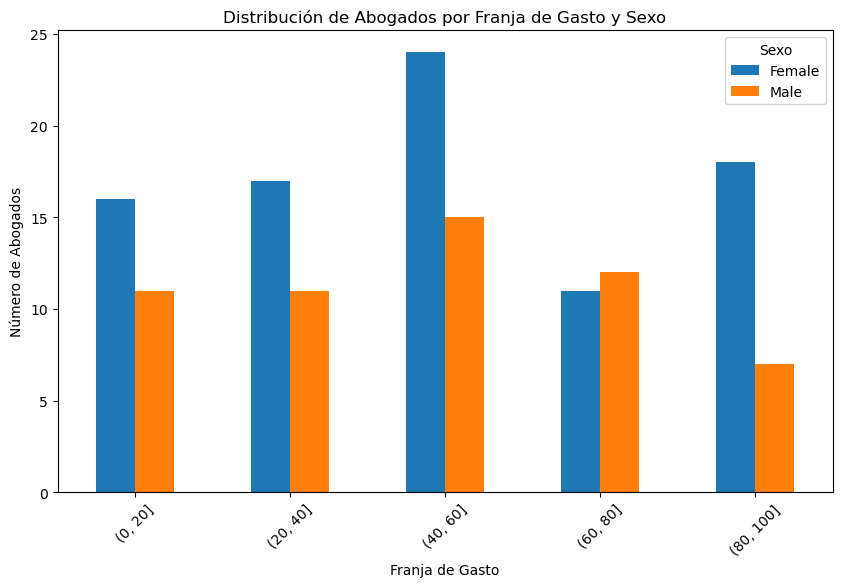

In [55]:
import matplotlib.pyplot as plt

# Creamos un gráfico de barras
g = abogados.groupby(['franja_gasto', 'gender']).size().unstack().plot(kind='bar', figsize=(10, 6))

# Personalizamos el gráfico
plt.title('Distribución de Abogados por Franja de Gasto y Sexo')
plt.xlabel('Franja de Gasto')
plt.ylabel('Número de Abogados')
plt.xticks(rotation=45)
plt.legend(title='Sexo')

# Mostramos el gráfico
plt.show()

## 4. Añade algún análisis que creas que puede ser interesante explicando por pantalla el resultado del mismo.

## 4.1 Proporción de hombres y mujeres

In [56]:
# Calculamos la cantidad de hombres y mujeres
conteo_genero = df['gender'].value_counts()

# Calculamos el porcentaje de hombres y mujeres
total = conteo_genero.sum()
porcentaje = (conteo_genero / total) * 100

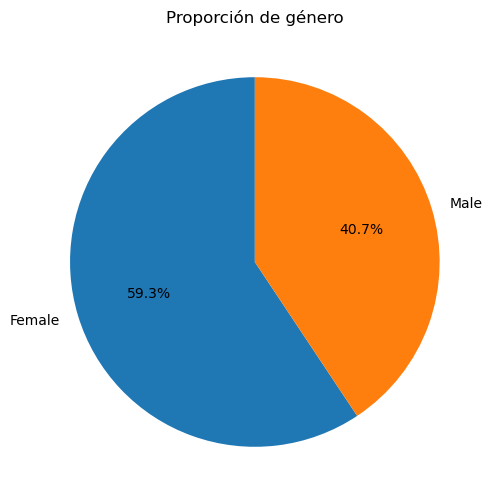

In [57]:
# Creamos un gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(porcentaje, labels=porcentaje.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de género')
plt.show()

## 4.2 Porcentaje de personas con ingresos anuales por encima de $160,000

In [58]:
# Calculamos el porcentaje de personas con ingresos por encima de 160000
clientes_con_ingresos_altos = df[df['annual_income_dollars'] > 160000]
porcentaje_ingresos_altos = (len(clientes_con_ingresos_altos) / len(df)) * 100

In [59]:
print("Porcentaje de personas con ingresos por encima de $160,000:  %",porcentaje_ingresos_altos)

Porcentaje de personas con ingresos por encima de $160,000:  % 18.11704834605598


## 4.3 ¿Cual es el gasto promedio por profesion?

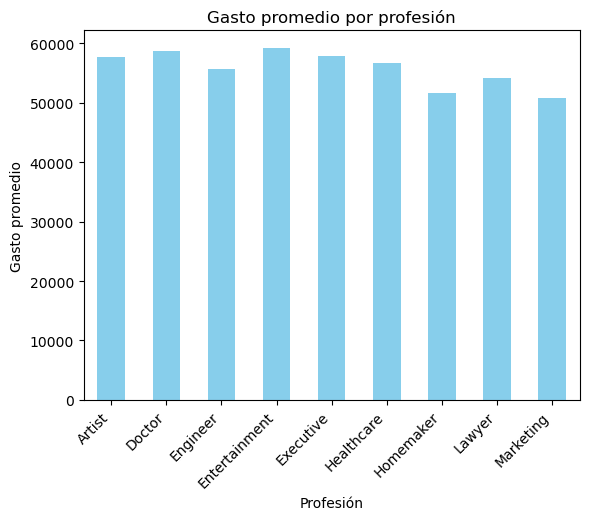

In [60]:
# Agrupamos por profesión y calculamos el promedio de spending_money
gasto_profesiones = df.groupby('profession')['spending_money'].mean()

# Crear un gráfico de barras
gasto_profesiones.plot(kind='bar', color='skyblue')
plt.title('Gasto promedio por profesión')
plt.xlabel('Profesión')
plt.ylabel('Gasto promedio')
plt.xticks(rotation=45, ha='right')
plt.show()

Este grafico nos muestra que en general las profesiones tienen un gasto promedio similar, siendo un poco mayor 'Entertainment', 'Doctor', 'Arist'. Y un menor gasto 'Homemaker'

## Consultas con SQL

Como ya tenemos una tabla limpia y con las columnas renombradas la utilizaremos para realizar las consultas con pandasql

In [61]:
#pip install pandasql

In [62]:
import pandasql as psql

In [63]:
df.head()

,customerid,gender,age,annual_income_dollars,spending_score,profession,work_experience,family_size,spending_money
0,1,Male,19,15000,39,Healthcare,1,4,5850.0
1,2,Male,21,35000,81,Engineer,3,3,28350.0
2,3,Female,20,86000,6,Engineer,1,1,5160.0
3,4,Female,23,59000,77,Lawyer,0,2,45430.0
4,5,Female,31,38000,40,Entertainment,2,6,15200.0


## 4.4 Seleccionar todos las personas cuya puntuación de gasto sea mayor o igual a 70 y edad entre 20 y 30 años:


In [64]:
query = "SELECT customerid, gender, age, spending_score FROM df WHERE spending_score >= 70 AND age BETWEEN 20 AND 30 ORDER BY spending_score DESC;"
resultado = psql.sqldf(query, locals())
print(resultado)

    customerid  gender  age  spending_score
0          313  Female   24             100
1         1138    Male   29             100
2         1433  Female   25              98
3          146    Male   28              97
4          186    Male   30              97
..         ...     ...  ...             ...
78        1814  Female   29              73
79          10  Female   30              72
80        1848  Female   26              72
81         954    Male   29              71
82        1821    Male   23              70

[83 rows x 4 columns]


Este resultado nos arroja las personas de entre 20 y 30 años con un spending_score alto por encima del 70 puntos

## 4.5 Seleccionar las 3 profesiones con mayor annual_income_dollars

In [65]:
query2 = "SELECT profession, SUM(annual_income_dollars) AS Total_Income FROM df GROUP BY profession ORDER BY Total_Income DESC LIMIT 3" 
resultado2 = psql.sqldf(query2, locals())
print(resultado2)

      profession  Total_Income
0         Artist      66571267
1     Healthcare      38162600
2  Entertainment      25892178


Observamos que las profesiones 'Artist', 'Healthcare', 'Entertainment' son las que tienen mayor ingreso anual segun estos datos

## 4.6 ¿Cual es la Edad promedio de cada profesion?

In [66]:
query3 = "SELECT profession, AVG(age) AS Edad_Promedio FROM df GROUP BY profession ORDER BY 2 DESC"
resultado3 = psql.sqldf(query3, locals())
print(resultado3)

      profession  Edad_Promedio
0       Engineer      55.094972
1  Entertainment      51.162393
2         Artist      49.004902
3     Healthcare      47.843658
4         Lawyer      47.753521
5         Doctor      46.621118
6      Executive      46.601307
7      Marketing      45.823529
8      Homemaker      45.366667


Ademas de ver la edad promedio por profesion, los resultados nos muestran que 'Engineer' tiene la mayor edad promedio con 55 años y 'Homemaker' tiene la menor edad promedio con 45 años.

## 4.7¿Cual es la persona con el mayor annual_income_dollars?

In [67]:
query4 = "SELECT customerid, gender, age, profession, MAX(annual_income_dollars)  FROM df"
resultado4 = psql.sqldf(query4, locals())
print(resultado4)

   customerid  gender  age profession  MAX(annual_income_dollars)
0         570  Female   91   Engineer                      189974


Los resultados nos muestran que la persona con el 'customer id' 570 tiene el mayor ingreso anual con $189,974.00

## 4.8¿Cual es el promedio de annual_income_dollars para hombres y mujeres?

In [68]:
query6 = "SELECT gender, AVG(annual_income_dollars) AS Promedio_Anual FROM df GROUP BY gender"
resultado6 = psql.sqldf(query6, locals())
print(resultado6)

   gender  Promedio_Anual
0  Female   110434.875643
1    Male   110880.342929


Podemos ver que segun estos datos los hombres y las mujeres tienen un ingreso anual parecido

## 4.9 ¿Cuales mujeres con edad mayor de 40, con profesion de Doctor tiene un ingreso menor a 60,000?


In [69]:
query7 = "SELECT * FROM df WHERE gender = 'Female' AND age>=40 and profession ='Doctor' AND annual_income_dollars < 60000"
resultado7 = psql.sqldf(query7, locals())
print(resultado7)

   customerid  gender  age  annual_income_dollars  spending_score profession  \
0          37  Female   42                  14000              17     Doctor   
1          67  Female   43                   3000              50     Doctor   
2          90  Female   50                  56000              46     Doctor   
3         209  Female   48                  15000               7     Doctor   
4         218  Female   83                  35000              99     Doctor   
5         262  Female   52                  35000              85     Doctor   
6         673  Female   65                  58318              45     Doctor   
7         819  Female   65                  56647              12     Doctor   
8        1405  Female   91                  53788              57     Doctor   

   work_experience  family_size  spending_money  
0                5            1         2380.00  
1                0            2         1500.00  
2                0            2        25760.00  

## 4.10 ¿Cuales son las 20 personas con mayor annual_income_dollars  y family_size menor a 3 integrantes ?

In [70]:
query8 = "SELECT customerid, gender, spending_money, family_size, annual_income_dollars FROM df WHERE family_size < 3 ORDER BY annual_income_dollars DESC, family_size ASC LIMIT 20"
resultado8 = psql.sqldf(query8, locals())
print(resultado8)

    customerid  gender  spending_money  family_size  annual_income_dollars
0          570  Female        70290.38            1                 189974
1         1166    Male        34109.64            1                 189498
2          962    Male         7574.28            1                 189357
3         1159  Female         7542.28            2                 188557
4          778    Male        97815.64            2                 188107
5         1294  Female       167229.22            2                 187898
6          417  Female        22520.04            1                 187667
7         1307  Female         5629.29            1                 187643
8          457    Male        13110.79            1                 187297
9         1253  Female       160546.52            1                 186682
10        1717    Male        95203.23            1                 186673
11        1589  Female        76442.45            1                 186445
12         403    Male   

Este resultado nos muestra a las 20 personas con un mayor ingreso anual y un número familiar menor a 3. Por ejemplo si tuviera esta información para la suscripción de coches, dado su ingreso y el número de integrantes menor, podrian tener un mayor poder adquisitivo y por tanto ser grupo interesante para ofrecerles más servicios.